## Trips and Stations

Our research question is "How is citibike representing NYC demographics? (in 2017)" 

The first step that we find crucial in answering our research question is how citibike trips and stations are distributed around NYC by each geodistrict.
After we figure out how the citibike trips and stations are distributed around NYC, we will be able find abnormalities or patterns with in the distrubution that we can take a closer look at.

##### Steps for Grouping by Geoid

Here we attempted to look at geoid 's which are measure ments stated by NYC census.
**We specifically chose to look at geoid's as the standard of grouping because?**


So the first initial steps that i will go through are

1. Grouping trips by Geoid
2. Grouping stations by Geoid


In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr

In [35]:
trip = pd.read_csv('../../Desktop/citibike-nyc/data_exploration/clean_trip_data.csv')

In [22]:
stations = pd.read_csv('../../Desktop/citibike-nyc/data_cleaning/citbike_stations/citibike_stations_geoid_final.csv')
ri = pd.read_csv('../../Desktop/citibike-nyc/data_cleaning/race_and_income/race_and_income_final.csv')

### 1. Group Trips by Geoid 

##### Issues

- start station end station divide

In [4]:
trip.head()

,Unnamed: 0,starttime,stoptime,start station name,end station name,usertype,birth year,gender,start_station_geoid,end_station_geoid,tripminutes
0,0,2017-01-01 00:00:21,2017-01-01 00:11:41,W 82 St & Central Park West,Central Park West & W 72 St,Subscriber,1965.0,2,3.606102e+10,3.606101e+10,11
1,1,2017-01-01 00:00:45,2017-01-01 00:22:08,Cooper Square & E 7 St,Broadway & W 32 St,Subscriber,1987.0,2,3.606100e+10,3.606101e+10,21
2,6,2017-01-01 00:05:00,2017-01-01 00:14:20,Broadway & W 60 St,9 Ave & W 45 St,Subscriber,1973.0,1,3.606101e+10,3.606101e+10,9
3,7,2017-01-01 00:05:37,2017-01-01 00:19:24,Broadway & W 37 St,E 10 St & Avenue A,Subscriber,1977.0,2,3.606101e+10,3.606100e+10,13
4,8,2017-01-01 00:05:47,2017-01-01 00:10:02,York St & Jay St,Carlton Ave & Flushing Ave,Subscriber,1989.0,1,3.604700e+10,3.604702e+10,4


As you can see here, the trips have start stations and end stations. In the data cleaning process, we linked unique geoids to the start and end stations. **Now we will count the number of trips taken at each unique geoid.**

### Start Stations

In [4]:
# group by start stations and count number of trips
trips_start_df = trip.groupby(['start_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_start_df = trips_start_df.sort_values('Number of Trips', ascending=False)
trips_start_df.head()

,start_station_geoid,Number of Trips
209,3.606101e+10,269945
269,3.606101e+10,257733
227,3.606101e+10,230264
242,3.606101e+10,228497
191,3.606101e+10,203787


In [5]:
trips_start_df = trips_start_df.rename(columns={'start_station_geoid': 'geoid'})
trips_start_df.head()

,geoid,Number of Trips
209,3.606101e+10,269945
269,3.606101e+10,257733
227,3.606101e+10,230264
242,3.606101e+10,228497
191,3.606101e+10,203787


In [8]:
len(trips_start_df)

382

In [14]:
trips_start_df['geoid'].nunique()

382

Here we grouped the trips by the start station geoid and found the number of trips taken at each of the unique start stations in 2017. 



We will plot a histogram to get a better idea of how the trips are distributed by geoid.

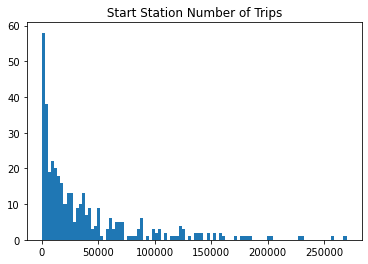

In [7]:
plt.hist(trips_start_df['Number of Trips'], bins=100)
plt.title(" Start Station Number of Trips ")
plt.show()

As you can see from the graph above, you can observe a very uneven distribution of start stations trips taken by geoid

### End Stations

In [6]:
#group by end stations and count number of trips
trips_end_df = trip.groupby(['end_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_end_df = trips_end_df.sort_values('Number of Trips', ascending=False)
trips_end_df.head()

,end_station_geoid,Number of Trips
209,3.606101e+10,264950
227,3.606101e+10,236628
269,3.606101e+10,236408
242,3.606101e+10,226033
191,3.606101e+10,208123


In [7]:
# rename column
# trips_end_df['geoid']=trips_end_df[]
trips_end_df = trips_end_df.rename(columns={'end_station_geoid': 'geoid'})
trips_end_df.head()

,geoid,Number of Trips
209,3.606101e+10,264950
227,3.606101e+10,236628
269,3.606101e+10,236408
242,3.606101e+10,226033
191,3.606101e+10,208123


In [23]:
len(trips_end_df)


382

In [24]:
trips_end_df['geoid'].nunique()

382

Here we grouped the trips by the start station geoid and found the number of trips taken at each of the unique start stations in 2017. 



We will plot a histogram to get a better idea of how the trips are distributed by geoid.

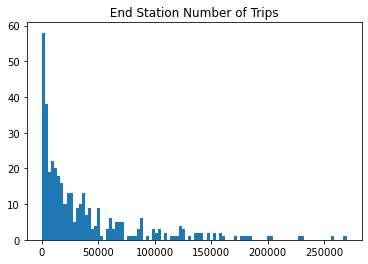

In [11]:
plt.hist(trips_start_df['Number of Trips'], bins=100)
plt.title(" End Station Number of Trips ")
plt.show()

As you can see from the graph above, you can observe a very uneven distribution of start stations trips taken by geoid

- How to compare how much start and end stations align with each other? Is the highest start station the highest end station?
- Normalization by Population

In [12]:
ri.head()

,geoid,2017 median income,2017 median income margin of error,2017 race: total households,2017 race: total households margin of error,2017 race: White,2017 race: Black,2017 race: Asian,2017 race: Other,2017 race: 2 or more races
0,36001000100,27250,10262,1939,260,502,1142,16,112,167
1,36001000200,24091,6623,4731,676,710,3474,104,32,411
2,36001000300,33454,15095,5558,646,2589,1539,559,291,580
3,36001000401,74255,7279,2459,266,2183,131,92,28,25
4,36001000403,70815,10428,4695,456,3256,714,416,79,230


### 2. Group Stations by Geoid 

In [8]:
#group by geoid and count number of stations
stations_geoid = stations.groupby(['geoid']).size().reset_index(name = 'Number of Stations')
stations_geoid = stations_geoid.sort_values('Number of Stations', ascending=False)
stations_geoid.head()

,geoid,Number of Stations
269,36061014300,14
24,36047005300,9
140,36061000700,7
344,36081001900,7
227,36061009900,6


In [9]:
stations_geoid.loc[stations_geoid['geoid'] == 36047010000]

,geoid,Number of Stations


In [26]:
stations['geoid'].nunique()

382

In [27]:
stations_geoid['geoid'].nunique()

382

(array([266.,  61.,  30.,  21.,   2.,   0.,   1.,   0.,   0.,   1.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

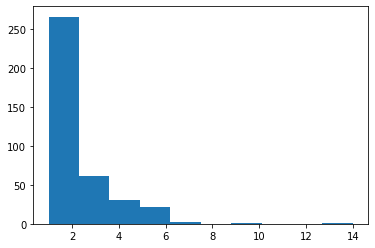

In [52]:
plt.hist(stations_geoid['Number of Stations'], bins=10)

In [53]:
stations_geoid['Number of Stations'].unique()

array([14,  9,  7,  6,  5,  4,  3,  2,  1])

Here we can see that there is a very uneven distribution of stations across geo ids. 
While some geoid's have 14 stations, a striking majority of geoids have 1 station.

In [54]:
stations_geoid['Number of Stations'].value_counts()

1     145
2     121
3      61
4      30
5      14
6       7
7       2
14      1
9       1
Name: Number of Stations, dtype: int64

Here, we can confirm and get a nummerical value of how the number of stations differ by geoid. 
A majority of the geoids have just 1 or 2 stations. 
However a few sect geoids hace 7, 9 ,14 stations.

Overall, we can see a very uneven distribution of stations per geoid

In [56]:
num_geoid=len(stations_geoid)
num_geoid

382

The total number of geoids are 382

### Add number of stations at each geoid 

#### Start Station

In [10]:
## Number of Stations at each geoid
trips_start_df= pd.merge(stations_geoid,trips_start_df,  on=['geoid'], how='inner')
trips_start_df.head()

,geoid,Number of Stations,Number of Trips
0,36061014300,14,257733
1,36047005300,9,24112
2,36061000700,7,161347
3,36081001900,7,16798
4,36061009900,6,230264


In [11]:
trips_start_df['Number of Stations'].unique()

array([14,  9,  7,  6,  5,  4,  3,  2,  1])

In [12]:
trips_start_df['Number of Stations'].value_counts()

1     145
2     121
3      61
4      30
5      14
6       7
7       2
14      1
9       1
Name: Number of Stations, dtype: int64

In [13]:
trips_start_df['geoid'].nunique()

382

#### End Station

In [14]:
## Number of Stations at each geoid
trips_end_df= pd.merge(stations_geoid,trips_end_df,  on=['geoid'], how='inner')
trips_end_df.head()

,geoid,Number of Stations,Number of Trips
0,36061014300,14,236408
1,36047005300,9,26498
2,36061000700,7,167929
3,36081001900,7,17109
4,36061009900,6,236628


In [34]:
trips_start_df['Number of Stations'].unique()

array([14,  9,  7,  6,  5,  4,  3,  2,  1])

## Plot number of stations by number of trips

### Start Stations

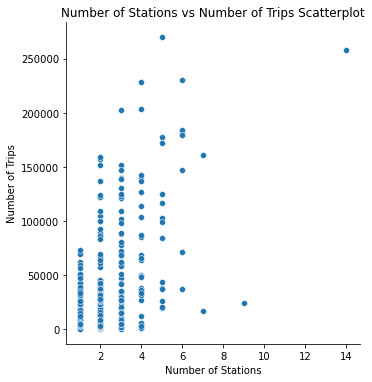

In [15]:
## Your solution here
sns.relplot(x="Number of Stations", y="Number of Trips", data=trips_start_df)
plt.xlabel("Number of Stations")
plt.ylabel("Number of Trips")
plt.title("Number of Stations vs Number of Trips Scatterplot")
plt.show()

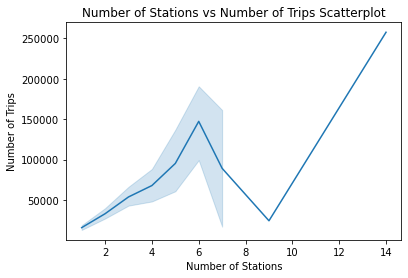

In [36]:
sns.lineplot(x="Number of Stations", y="Number of Trips", data=trips_start_df)
plt.xlabel("Number of Stations")
plt.ylabel("Number of Trips")
plt.title("Number of Stations vs Number of Trips Scatterplot")
plt.show()

### End Stations

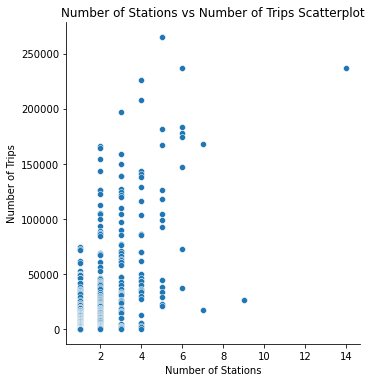

In [37]:
## Your solution here
sns.relplot(x="Number of Stations", y="Number of Trips", data=trips_end_df)
plt.xlabel("Number of Stations")
plt.ylabel("Number of Trips")
plt.title("Number of Stations vs Number of Trips Scatterplot")
plt.show()

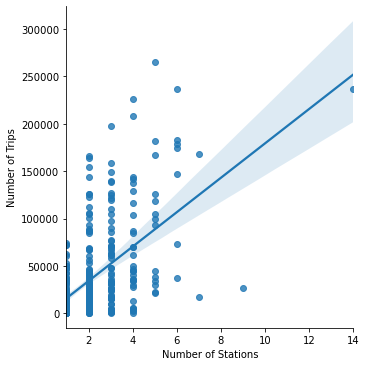

In [40]:
sns.lmplot(x="Number of Stations", y="Number of Trips",  data=trips_end_df)

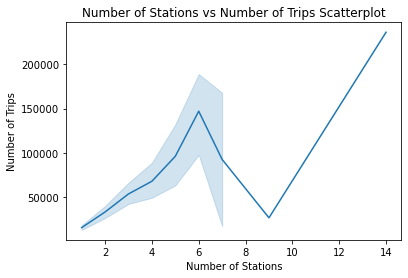

In [38]:
sns.lineplot(x="Number of Stations", y="Number of Trips", data=trips_end_df)
plt.xlabel("Number of Stations")
plt.ylabel("Number of Trips")
plt.title("Number of Stations vs Number of Trips Scatterplot")
plt.show()

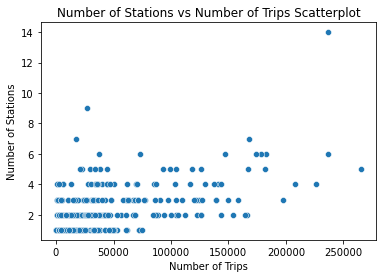

In [43]:
sns.scatterplot(x="Number of Trips", y="Number of Stations", data=trips_end_df)
plt.xlabel("Number of Trips")
plt.ylabel("Number of Stations")
plt.title("Number of Stations vs Number of Trips Scatterplot")
plt.show()

From the two graphs of the relationship between number of stations and the number of trips, we can't conclude that more stations will necesscarily correlate with more trips.


- not a linear relationship... 
- what can we use in this case? 

- no trips between 10-13
- why are there 9 stations in a place with almost no trips at all...? 
- there is a very disproportionate place ment of the number of trips.
- what could be the reason for this? 


In [41]:
trips_end_df['Number of Stations'].value_counts()

1     145
2     121
3      61
4      30
5      14
6       7
7       2
14      1
9       1
Name: Number of Stations, dtype: int64

#### Exploring geoid with 9 stations, the top 2 most num of stations but with one of the lowest amounts of trips taken

In [16]:
#### 9 Stations ? 
trips_end_df.loc[trips_end_df['Number of Stations'] == 9]

,geoid,Number of Stations,Number of Trips
1,36047005300,9,26498


In [17]:
trips_start_df.loc[trips_start_df['Number of Stations'] == 9]

,geoid,Number of Stations,Number of Trips
1,36047005300,9,24112


The place with 9 stations is this place
https://popfactfinder.planning.nyc.gov/#13.24/40.67547/-74.00928

In [18]:
## Check the racial distribution of this place
ri_2=ri.loc[ri['geoid'] == 36047005300]
ri_2

,geoid,2017 median income,2017 median income margin of error,2017 race: total households,2017 race: total households margin of error,2017 race: White,2017 race: Black,2017 race: Asian,2017 race: Other,2017 race: 2 or more races
1099,36047005300,93750,13927,2420,271,1441,253,40,567,119


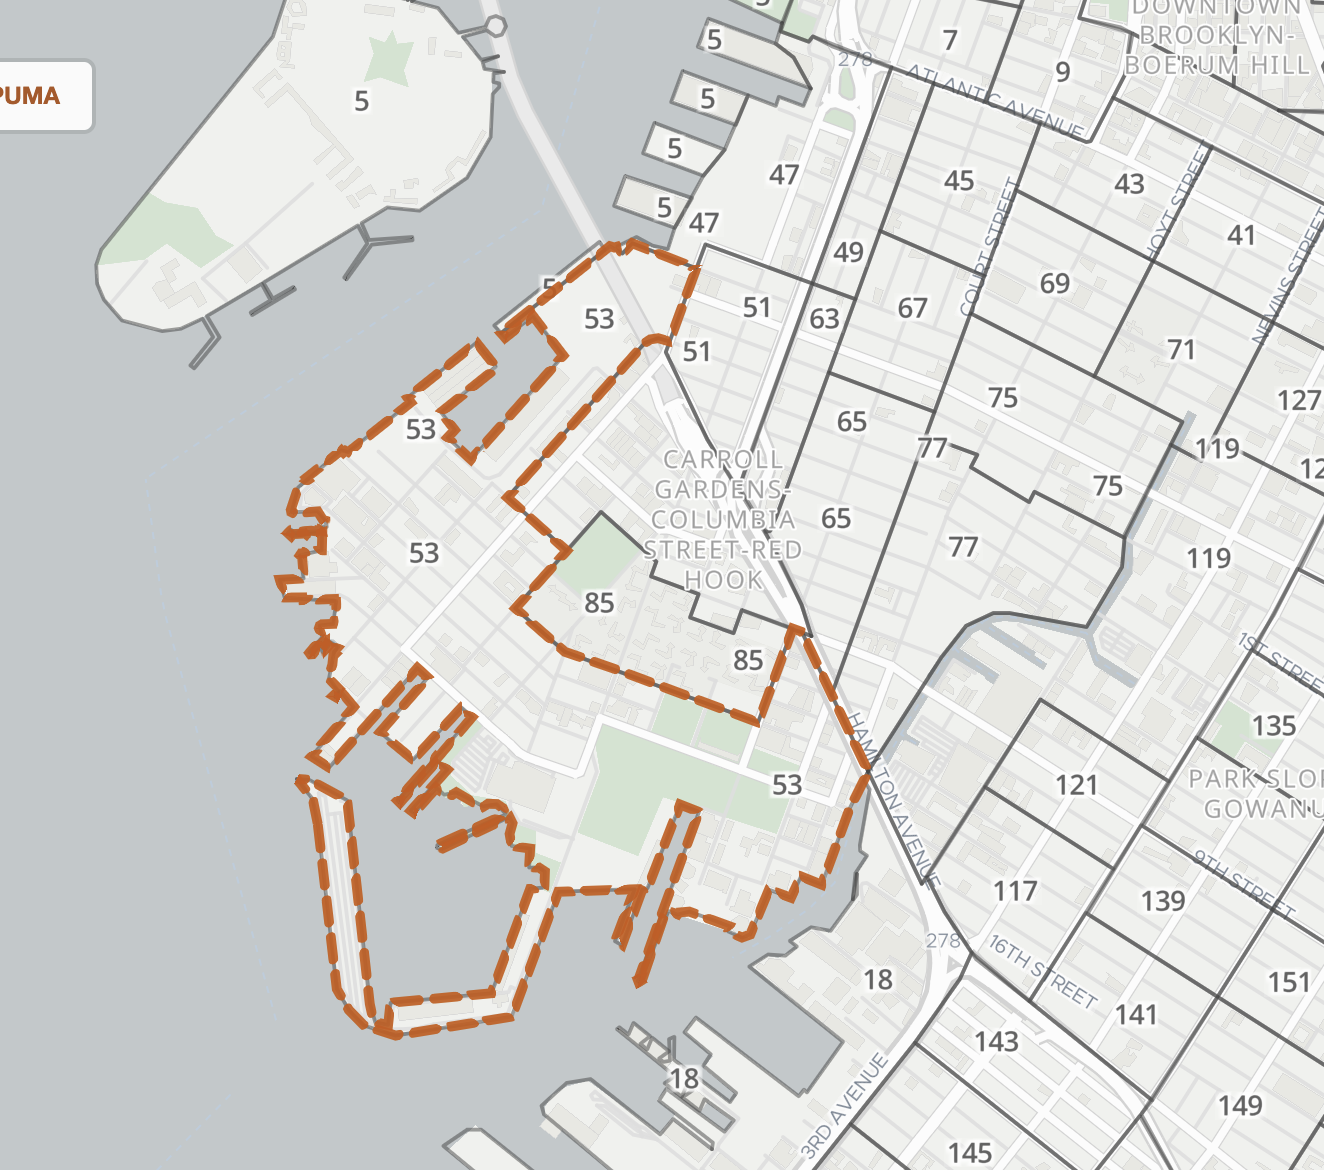

guessing since there are parks here, and its along the border , shore more leisure areas...? 
thats why they put more bikes here.
Also infrastructure... etc

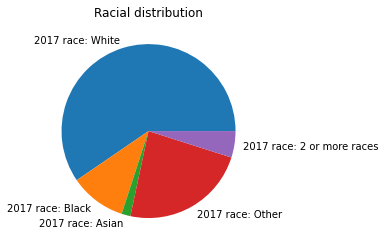

In [19]:
# racial proportion of this place
race_sum = ri_2[['2017 race: White','2017 race: Black','2017 race: Asian','2017 race: Other','2017 race: 2 or more races']].sum()
mylabels = race_sum.index
plt.pie(race_sum,labels=mylabels)
plt.title('Racial distribution')
plt.show()

https://popfactfinder.planning.nyc.gov/profile/1049/demographic 
Even more specific breakdown of racial distribution in this area. 
Not that much population overall, 

Another things is that the majority of population in this place is white.. 

In [20]:
#find all stations with this geoid
stations_2=stations.loc[stations['geoid'] == 36047005300]
stations_2

,station_id,station_name,lat,lon,first_trip,last_trip,rides,geoid
575,3330.0,Henry St & Bay St,40.672506,-74.004947,2016-08-27,2019-07-31,6306,36047005300
583,3326.0,Clinton St & Centre St,40.674340,-74.001947,2016-08-30,2019-07-31,6523,36047005300
590,3340.0,Wolcott St & Dwight St,40.675327,-74.010070,2016-08-30,2019-07-31,7217,36047005300
592,3353.0,Reed St & Van Brunt St,40.674784,-74.016128,2016-08-31,2017-08-28,8246,36047005300
604,3337.0,Dwight St & Van Dyke St,40.673636,-74.011956,2017-02-01,2019-07-31,5961,36047005300
608,3347.0,Van Brunt St & Wolcott St,40.677343,-74.012751,2016-09-01,2019-07-31,20220,36047005300
609,3348.0,Coffey St & Conover St,40.677236,-74.015665,2016-09-01,2019-07-31,14754,36047005300
611,3352.0,Sigourney St & Columbia St,40.672672,-74.008795,2017-01-01,2019-07-31,7827,36047005300
823,3644.0,Van Dyke St & Van Brunt St,40.675816,-74.014882,2017-10-01,2018-05-31,2954,36047005300


In [22]:
ri['2017 median income'].mean()

68452.91978274494

In [26]:
## Check the racial distribution of this place
ri_2=ri.loc[ri['geoid'] == 36047005300]
ri_2

,geoid,2017 median income,2017 median income margin of error,2017 race: total households,2017 race: total households margin of error,2017 race: White,2017 race: Black,2017 race: Asian,2017 race: Other,2017 race: 2 or more races
1099,36047005300,93750,13927,2420,271,1441,253,40,567,119


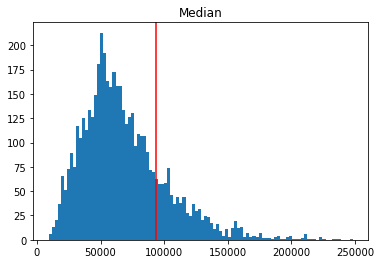

In [39]:
#where the income lies in the distribution of incomes
plt.hist(ri['2017 median income'], bins=100)
plt.axvline(x=93750,c='red')
plt.title('Median')
plt.show()

Median income is in the high range for the area with most stations

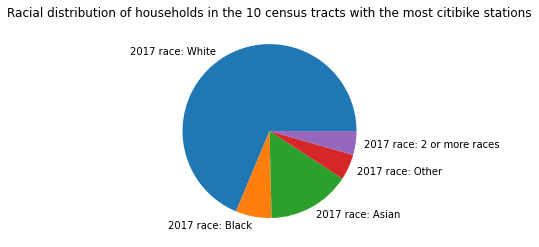

In [14]:
top_10_race_sum = top_10_stations_geoid_race_income_df[['2017 race: White','2017 race: Black','2017 race: Asian','2017 race: Other','2017 race: 2 or more races']].sum()
mylabels = top_10_race_sum.index
plt.pie(top_10_race_sum,labels=mylabels)
plt.title('Racial distribution of households in the 10 census tracts with the most citibike stations')
plt.show()

## more things to look into
- for places with 1 stations what is the income distribution, racial distribution like? 
- for places with 1 stations where are the places with most trips? / less trips?
- look more into anomalities of places with more stations

Data analysis.

Use summary functions like mean and standard deviation along with visual displays like scatterplots and histograms to describe data.

Provide at least one model showing patterns or relationships between variables that addresses your research question. 

This could be a regression or clustering, or something else that measures some property of the dataset.
Evaluation of significance. Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 

## Linear Regression

In [37]:
# instantiate linear regression model
linear_model= lr()

In [38]:
x=trips_start_df[['Number of Stations']]
y=trips_start_df['Number of Trips']

NameError: name 'trips_start_df' is not defined

In [53]:
lr = linear_model.fit(x, y)
slope = linear_model.coef_[0]
pred_y= lr.predict(x)
r2 = lr.score(x, y)


In [55]:
correct= sum(y==pred_y)
num_total=len(y)

pred_acc=correct/num_total

print("Prediction Accuracy : {:.1f}".format(pred_acc*100)+"%" )

Prediction Accuracy : 0.0%


In [54]:
slope

18341.25951514791

- could do more specific linear regression with train test split and all like this : https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

- but hard to justify why I am doing so. 

## Multiple Regression with Population considered

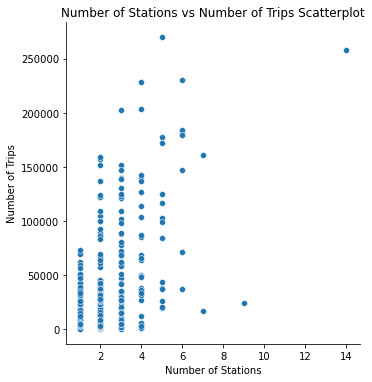

In [15]:
## Your solution here
sns.relplot(x="Number of Stations", y="Number of Trips", data=trips_start_df)
plt.xlabel("Number of Stations")
plt.ylabel("Number of Trips")
plt.title("Number of Stations vs Number of Trips Scatterplot")
plt.show()

In [ ]:
- If we add population here, and try to do an analysis by population? will it be significant? 
- 

## What is the relationship with Trips and Stations along with other data?

1. Population
2. Income+ Race 

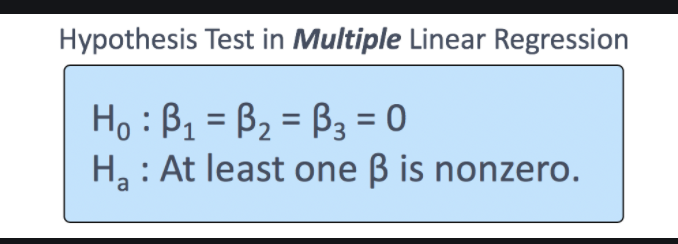

### 1. Population 

Hypothesis 

Ho: The number of stations and population **will not** have a significant impact in predicting number of trips

Ha: The number of stations and population **will** have a significant impact in predicting number of trips

In [58]:
ri.head()

,geoid,2017 median income,2017 median income margin of error,2017 race: total households,2017 race: total households margin of error,2017 race: White,2017 race: Black,2017 race: Asian,2017 race: Other,2017 race: 2 or more races
0,36001000100,27250,10262,1939,260,502,1142,16,112,167
1,36001000200,24091,6623,4731,676,710,3474,104,32,411
2,36001000300,33454,15095,5558,646,2589,1539,559,291,580
3,36001000401,74255,7279,2459,266,2183,131,92,28,25
4,36001000403,70815,10428,4695,456,3256,714,416,79,230


In [59]:
# add populations to trips data.

trips_start_df.head()

,geoid,Number of Stations,Number of Trips
0,36061014300,14,257733
1,36047005300,9,24112
2,36061000700,7,161347
3,36081001900,7,16798
4,36061009900,6,230264


In [71]:
len(ri['geoid'])

4787

In [76]:
trips_start_df.head()

,geoid,Number of Stations,Number of Trips
0,36061014300,14,257733
1,36047005300,9,24112
2,36061000700,7,161347
3,36081001900,7,16798
4,36061009900,6,230264


In [85]:
d = pd.merge(ri,trips_start_df,  on=['geoid'], how='inner')
col_list=['geoid','Number of Trips','Number of Stations','2017 race: total households']
d= d[col_list]
d.head()


,geoid,Number of Trips,Number of Stations,2017 race: total households
0,36047000100,13501,2,4116
1,36047000301,23420,2,4340
2,36047000501,23468,1,4536
3,36047000502,8526,1,2756
4,36047000700,37675,2,4054


In [94]:
d['geoid'].nunique()

373

In [96]:
y_=d['geoid']

y=trips_start_df['geoid']

len(y)-len(y_)

9

In [103]:
l=pd.concat([d['geoid'],trips_start_df['geoid']]).drop_duplicates(keep=False)
l

0      36061014300
10     36061002100
23     36047017700
40     36061000500
135    36081009900
169    36061031703
177    36061009400
223    36047001800
276    36081003700
Name: geoid, dtype: int64

In [ ]:
36061014300 : Central Park
36061002100 : Seems like a valid geoid .. don't know why its missing.. 
36047017700 : Prospect Park
36061000500 : Govennor's Island (Check if people don't live here.. )
36081009900 : Astoria Park
36061031703 : Rockfellor Park
36061009400 : Valid place... I think
36047001800 : Brooklyn Bridge Park
36081003700 : Queensbridge Park

just check and find race/income/ population data for these geoids, if not leave them out as missing.. 
36061002100
36061009400

These geoid's may have been removed from the original data cleaning process

checking original data

In [14]:
ri_org= pd.read_csv('../citibike-nyc/data_cleaning/race_and_income/race_and_income_data.csv')
ri_org.head()

,geoid,2012 median income,2012 median income margin of error,2012 race: total households,2012 race: total households margin of error,2012 race: White,2012 race: Black,2012 race: Asian,2012 race: Other,2012 race: 2 or more races,...,2016 race: 2 or more races,2017 median income,2017 median income margin of error,2017 race: total households,2017 race: total households margin of error,2017 race: White,2017 race: Black,2017 race: Asian,2017 race: Other,2017 race: 2 or more races
0,36001000100,35476,12375,2235,294,602,1401,38,80,114,...,141,27250,10262,1939,260,502,1142,16,112,167
1,36001000200,25756,4168,5412,792,630,4244,110,76,352,...,241,24091,6623,4731,676,710,3474,104,32,411
2,36001000300,33571,9698,6421,740,2709,2824,196,465,227,...,425,33454,15095,5558,646,2589,1539,559,291,580
3,36001000401,71902,13641,2412,188,2142,207,15,15,33,...,0,74255,7279,2459,266,2183,131,92,28,25
4,36001000403,60298,15797,4540,500,3223,725,538,52,2,...,175,70815,10428,4695,456,3256,714,416,79,230


Found the missing geoids that seemed like valid places in the original dataset.

In [28]:
ri_org_2=ri_org.loc[ri_org['geoid'] == 36061002100]
columns=['geoid', '2017 median income', '2017 median income margin of error',
       '2017 race: total households',
       '2017 race: total households margin of error', '2017 race: White',
       '2017 race: Black', '2017 race: Asian', '2017 race: Other',
       '2017 race: 2 or more races']


ri_org_2=ri_org_2[columns]
ri_org_2

,geoid,2017 median income,2017 median income margin of error,2017 race: total households,2017 race: total households margin of error,2017 race: White,2017 race: Black,2017 race: Asian,2017 race: Other,2017 race: 2 or more races
2407,36061002100,"250,000+",***,6863,580,5443,77,961,23,359


In [27]:
ri_org_3=ri_org.loc[ri_org['geoid'] == 36061009400]

columns=['geoid', '2017 median income', '2017 median income margin of error',
       '2017 race: total households',
       '2017 race: total households margin of error', '2017 race: White',
       '2017 race: Black', '2017 race: Asian', '2017 race: Other',
       '2017 race: 2 or more races']


ri_org_3=ri_org_3[columns]
ri_org_3

,geoid,2017 median income,2017 median income margin of error,2017 race: total households,2017 race: total households margin of error,2017 race: White,2017 race: Black,2017 race: Asian,2017 race: Other,2017 race: 2 or more races
2481,36061009400,-,**,56,32,56,0,0,0,0


In [25]:
ri.columns

Index(['geoid', '2017 median income', '2017 median income margin of error',
       '2017 race: total households',
       '2017 race: total households margin of error', '2017 race: White',
       '2017 race: Black', '2017 race: Asian', '2017 race: Other',
       '2017 race: 2 or more races'],
      dtype='object')

Found missing race data for these geoids.


In [30]:
len(ri)

4787

In [31]:
ri_final = ri.append(ri_org_3)
len(ri_final)

4788

In [33]:
ri_final = ri_final.append(ri_org_2)
len(ri_final)

4789

In [34]:
## save new race_income dataset with these geoids included
ri_final.to_csv('race_and_income_final_2.csv',index=False)

In [36]:
## remove geoids from trip dataset+ stations dataset
geoids_remove=['36061014300','36047017700','36061000500','36081009900','36061031703','36047001800','36081003700']

trip_2 = trip[trip.geoid == geoids_remove]

AttributeError: 'DataFrame' object has no attribute 'geoid'

### 2. Income + Race

Hypothesis 

Ho: The number of stations and income + race **will not** have a significant impact in predicting number of trips

Ha: The number of stations and income + race **will** have a significant impact in predicting number of trips

- nummerical value prediction, how to calcuate accuracy rate for this ? 
